<a href="https://colab.research.google.com/github/jumacaq/atencion_oncologica_peru_2022_2023/blob/main/Atenciones_Oncol%C3%B3gicas_Per%C3%BA_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando librerías y dataset

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_rows',20)# set_option()display.max_rows aumenta el número de filas en la vista previa  del DataFrame
pd.set_option('display.max_columns',25)


In [70]:
df_2022 = pd.read_csv('/content/drive/MyDrive/Explora_IA_ONCOLOGIA/DATA ATENCIONES ONCOLOGICAS 2022.csv',sep=';')
df_2023 = pd.read_csv('/content/drive/MyDrive/Explora_IA_ONCOLOGIA/CARGA_DATASETS_V2.csv',encoding='latin-1',sep=';')


In [71]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513530 entries, 0 to 513529
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DOCUMENTO_ANONIMIZADO  513530 non-null  int64  
 1   PERIODO                513530 non-null  int64  
 2   RENAES                 513530 non-null  int64  
 3   IPRESS                 513386 non-null  object 
 4   REGION                 513530 non-null  object 
 5   DEPARTAMENTO           497494 non-null  object 
 6   PROVINCIA              497494 non-null  object 
 7   DISTRITO               497494 non-null  object 
 8   UBIGEO                 497494 non-null  float64
 9   CODIGO_DIAGNOSTICO     513530 non-null  object 
 10  DIAGNOSTICOS           513530 non-null  object 
 11  GRUPO_DIAGNOSTICOS     513530 non-null  object 
 12  GRUPO_COBERTURA        513530 non-null  object 
 13  SEXO                   513530 non-null  object 
 14  EDAD                   513530 non-nu

In [72]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307145 entries, 0 to 307144
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DOCUMENTO_ANONIMIZADO  307145 non-null  int64  
 1   PERIODO                307145 non-null  int64  
 2   RENAES                 307145 non-null  int64  
 3   IPRESS                 307145 non-null  object 
 4   REGION                 307145 non-null  object 
 5   DEPARTAMENTO           307145 non-null  object 
 6   PROVINCIA              307145 non-null  object 
 7   DISTRITO               307145 non-null  object 
 8   UBIGEO                 298296 non-null  float64
 9   CODIGO_DIAGNOSTICO     307145 non-null  object 
 10  DIAGNOSTICOS           307145 non-null  object 
 11  GRUPO_DIAGNOSTICOS     307145 non-null  object 
 12  GRUPO_COBERTURA        307145 non-null  object 
 13  SEXO                   307145 non-null  object 
 14  EDAD                   307145 non-nu

In [73]:
df_2023.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,64271,202303,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,45,SIS PARA TODOS,71,Apoyo al diagnóstico,20230217,NaN,NaN,168.95,20231113
1,64278,202302,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,49,SIS GRATUITO,901,Apoyo al Tratamiento,20230130,NaN,NaN,32.12,20231113
2,64281,202306,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C504,TUMOR MALIGNO DEL CUADRANTE SUPERIOR EXTERNO D...,CANCER DE MAMA,ONCOLOGICAS,FEMENINO,47,SIS PARA TODOS,56,Consulta externa,20230527,NaN,NaN,84.62,20231113
3,64283,202303,7397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,40101.0,C61X,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,ONCOLOGICAS,MASCULINO,64,SIS GRATUITO,56,Consulta externa,20230203,NaN,NaN,22.74,20231113
4,64286,202301,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C910,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,ONCOLOGICAS,MASCULINO,14,SIS GRATUITO,56,Consulta externa,20230106,NaN,NaN,9.28,20231113


In [74]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307145 entries, 0 to 307144
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DOCUMENTO_ANONIMIZADO  307145 non-null  int64  
 1   PERIODO                307145 non-null  int64  
 2   RENAES                 307145 non-null  int64  
 3   IPRESS                 307145 non-null  object 
 4   REGION                 307145 non-null  object 
 5   DEPARTAMENTO           307145 non-null  object 
 6   PROVINCIA              307145 non-null  object 
 7   DISTRITO               307145 non-null  object 
 8   UBIGEO                 298296 non-null  float64
 9   CODIGO_DIAGNOSTICO     307145 non-null  object 
 10  DIAGNOSTICOS           307145 non-null  object 
 11  GRUPO_DIAGNOSTICOS     307145 non-null  object 
 12  GRUPO_COBERTURA        307145 non-null  object 
 13  SEXO                   307145 non-null  object 
 14  EDAD                   307145 non-nu

### Cambiando tipo de dato

Cambiamos tipo de dato a columna 'PERIODO' y 'FECHA_ATENCION' de numérico a datetime

In [75]:
df_2022['PERIODO'] = pd.to_datetime(df_2022['PERIODO'], format='%Y%m')
df_2022['FECHA_ATENCION'] = pd.to_datetime(df_2022['FECHA_ATENCION'], format='%Y%m%d')

In [76]:
df_2023['PERIODO'] = pd.to_datetime(df_2023['PERIODO'], format='%Y%m')
df_2023['FECHA_ATENCION'] = pd.to_datetime(df_2023['FECHA_ATENCION'], format='%Y%m%d')

### Concatenando dataframes

In [77]:
df = pd.concat([df_2022,df_2023],axis=0,ignore_index=True)
df.shape

(820675, 23)

In [78]:
df.sample(5)

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
640165,23401,2023-05-01,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,R. LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,Consulta externa,2023-04-19,NaN,20230419.0,10.55,20231113
276007,59872,2022-12-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,54,SIS PARA TODOS,906,Consulta externa por profesionales no médicos ...,2022-11-16,NaN,NaN,5.16,20230525
624417,18440,2023-01-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,65,SIS GRATUITO,56,Consulta externa,2023-01-11,NaN,NaN,130.02,20231113
401923,42594,2022-11-01,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,53,SIS GRATUITO,910,Telemonitoreo con Prescripción y Entrega de Me...,2022-09-08,NaN,NaN,0.69,20230525
345683,6783,2022-07-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,69,SIS GRATUITO,901,Apoyo al Tratamiento,2022-05-25,NaN,NaN,306.06,20230525


# Limpieza de datos

In [79]:
df_limpio = df.copy()
df_limpio.head()


,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,2022-12-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,62,SIS GRATUITO,909,Teleorientación,2022-12-01,NaN,NaN,0.00,20230525
1,5060,2022-12-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,Consulta externa,2022-11-15,NaN,NaN,5.92,20230525
2,112180,2022-07-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*),2022-06-28,NaN,NaN,222.04,20230525
3,112180,2022-12-01,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,2022-11-11,NaN,NaN,23.45,20230525
4,112180,2022-12-01,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,2022-11-30,NaN,NaN,23.45,20230525


In [80]:
df_limpio.shape

(820675, 23)

In [81]:
#Eliminamos los duplicados del DataFrame
df_limpio = df_limpio[~df_limpio.index.duplicated(keep='first')]
df_limpio.shape

(820675, 23)

In [82]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820675 entries, 0 to 820674
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOCUMENTO_ANONIMIZADO  820675 non-null  int64         
 1   PERIODO                820675 non-null  datetime64[ns]
 2   RENAES                 820675 non-null  int64         
 3   IPRESS                 820531 non-null  object        
 4   REGION                 820675 non-null  object        
 5   DEPARTAMENTO           804639 non-null  object        
 6   PROVINCIA              804639 non-null  object        
 7   DISTRITO               804639 non-null  object        
 8   UBIGEO                 795790 non-null  float64       
 9   CODIGO_DIAGNOSTICO     820675 non-null  object        
 10  DIAGNOSTICOS           820675 non-null  object        
 11  GRUPO_DIAGNOSTICOS     820675 non-null  object        
 12  GRUPO_COBERTURA        820675 non-null  obje

###Eliminando columnas innecesarias

 Haciendo un análisis de la importancia de cada columna considero que hay cuatro columnas que no aportan valor al análisis: 'UBIGEO', 'CODIGO_DIAGNOSTICO','GRUPO_COBERTURA' y 'FECHA_CORTE' principalmente porque repiten el mismo valor dentro de la columna.

In [83]:
df_limpio.columns

Index(['DOCUMENTO_ANONIMIZADO', 'PERIODO', 'RENAES', 'IPRESS', 'REGION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'CODIGO_DIAGNOSTICO',
       'DIAGNOSTICOS', 'GRUPO_DIAGNOSTICOS', 'GRUPO_COBERTURA', 'SEXO', 'EDAD',
       'TIPO_SEGURO', 'CODIGO_SERVICIO', 'SERVICIO', 'FECHA_ATENCION',
       'FECHA_INTERNAMIENTO', 'FECHA_ALTA', 'MONTO_BRUTO', 'FECHA_CORTE'],
      dtype='object')

In [84]:
df_limpio.drop(['UBIGEO', 'CODIGO_DIAGNOSTICO','GRUPO_COBERTURA','FECHA_CORTE'],axis=1,inplace=True)
df_limpio.shape

(820675, 19)

In [85]:
df_limpio.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO
0,5060,2022-12-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,FEMENINO,62,SIS GRATUITO,909,Teleorientación,2022-12-01,NaN,NaN,0.00
1,5060,2022-12-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,FEMENINO,61,SIS GRATUITO,56,Consulta externa,2022-11-15,NaN,NaN,5.92
2,112180,2022-07-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*),2022-06-28,NaN,NaN,222.04
3,112180,2022-12-01,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,2022-11-11,NaN,NaN,23.45
4,112180,2022-12-01,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,2022-11-30,NaN,NaN,23.45


### Tratamiento de datos nulos




Hay datos nulos en las columnas 'DEPARTAMENTO' , 'PROVINCIA' y 'DISTRITO' veremos donde estan:

In [86]:
#Identificamos valores nulos en la columna 'departamento'
df_limpio[df_limpio['DEPARTAMENTO'].isnull()].tail()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO
501562,84588,2022-07-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,FEMENINO,6,SIS GRATUITO,56,Consulta externa,2022-05-10,20220510.0,20220510.0,33.255
501563,84588,2022-06-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,FEMENINO,6,SIS GRATUITO,56,Consulta externa,2022-03-16,20220316.0,20220316.0,73.260
501564,84588,2022-11-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,FEMENINO,6,SIS GRATUITO,56,Consulta externa,2022-07-13,NaN,20220713.0,20.040
504631,94789,2022-05-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,"LEUCEMIA AGUDA, CELULAS DE TIPO NO ESPECIFICADO",LEUCEMIA,FEMENINO,4,SIS GRATUITO,907,Atención por Telesalud,2022-03-08,20220308.0,20220308.0,0.000
509568,22449,2022-11-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,LESION DE SITIOS CONTIGUOS DEL CUELLO DEL UTERO,CANCER DE CUELLO UTERINO,FEMENINO,3,SIS GRATUITO,56,Consulta externa,2022-09-08,NaN,20220908.0,151.990


In [87]:
df_limpio[df_limpio['PROVINCIA'].isnull()].REGION.drop_duplicates()

540         JUNIN
26006    AREQUIPA
Name: REGION, dtype: object

Todos los valores nulos de la columnas 'DEPARTAMENTO','PROVINCIA' y 'DISTRITO' estan en solo en las regiones Arequipa y Junin, para no modificar significativamente las datos de esas regiones vamos a colocar el valor 'Unknown' a los valores nulos de esas columnas.

In [88]:
df_limpio['DEPARTAMENTO'] = df_limpio['DEPARTAMENTO'].fillna('Unknown')
df_limpio['PROVINCIA'] = df_limpio['PROVINCIA'].fillna('Unknown')
df_limpio['DISTRITO'] = df_limpio['DISTRITO'].fillna('Unknown')
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 820675 entries, 0 to 820674
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOCUMENTO_ANONIMIZADO  820675 non-null  int64         
 1   PERIODO                820675 non-null  datetime64[ns]
 2   RENAES                 820675 non-null  int64         
 3   IPRESS                 820531 non-null  object        
 4   REGION                 820675 non-null  object        
 5   DEPARTAMENTO           820675 non-null  object        
 6   PROVINCIA              820675 non-null  object        
 7   DISTRITO               820675 non-null  object        
 8   DIAGNOSTICOS           820675 non-null  object        
 9   GRUPO_DIAGNOSTICOS     820675 non-null  object        
 10  SEXO                   820675 non-null  object        
 11  EDAD                   820675 non-null  int64         
 12  TIPO_SEGURO            820675 non-null  obje

Hay muchos valores nulos en las columnas 'FECHA_INTERNAMIENTO' y 'FECHA_ALTA', vamos a analizar.

In [89]:
df_limpio[~df_limpio['FECHA_INTERNAMIENTO'].isnull()]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO
39,17680,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,907,Atención por Telesalud,2022-03-02,20220302.0,20220302.0,0.0000
40,17680,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,67,Internamiento con intervención quirúrgica mayor,2022-03-22,20220314.0,20220322.0,1251.4755
41,17680,2022-07-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,71,Apoyo al diagnóstico (*),2022-07-02,20220702.0,20220702.0,15.4400
43,18840,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,FEMENINO,77,SIS GRATUITO,65,Internamiento en EESS sin intervención quirúrgica,2022-03-08,20220223.0,20220308.0,820.4345
72,20870,2022-05-01,5577,HOSPITAL AMAZONICO - YARINACOCHA,UCAYALI,Ucayali,Coronel Portillo,Yarinacocha,TUMOR MALIGNO DE EXOCERVIX,CANCER DE CUELLO UTERINO,FEMENINO,69,SIS GRATUITO,56,Consulta externa,2022-05-20,20220520.0,20220520.0,16.5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820450,98721,2023-05-01,4317,HOSPITAL REGIONAL DOCENTE LAS MERCEDES,LAMBAYEQUE,Lambayeque,Chiclayo,Chiclayo,LEUCEMIA LINFOCITICA CRONICA,LEUCEMIA,FEMENINO,75,SIS GRATUITO,65,Internamiento en EESS sin intervención quirúrgica,2023-04-20,20230417.0,20230420.0,677.4600
820476,98896,2023-05-01,7397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,FEMENINO,11,SIS GRATUITO,65,Internamiento en EESS sin intervención quirúrgica,2023-05-03,20230325.0,20230503.0,5271.8160
820495,98951,2023-04-01,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,JUNIN,CONCEPCION,CONCEPCION,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,60,SIS GRATUITO,67,Internamiento con intervención quirúrgica mayor,2023-02-01,20230127.0,20230201.0,846.0400
820519,99101,2023-05-01,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,FEMENINO,61,SIS PARA TODOS,66,Internamiento con intervención quirúrgica menor,2023-04-21,20230421.0,20230421.0,391.2975


In [90]:
df_limpio[~df_limpio['FECHA_INTERNAMIENTO'].isnull()].SERVICIO.drop_duplicates()

39                                   Atención por Telesalud
40          Internamiento con intervención quirúrgica mayor
41                                 Apoyo al diagnóstico (*)
43        Internamiento en EESS sin intervención quirúrgica
72                                         Consulta externa
113                 Atención por emergencia con observación
128                                         Teleorientación
267                                      Atención en tópico
476         Internamiento con intervención quirúrgica menor
541                                    Apoyo al Tratamiento
562                                 Atención por emergencia
1126             Intervención médico-quirúrgica ambulatoria
1351      Internamientocon Estancia en la Unidad de Cuid...
2173      Consulta externa por profesionales no médicos ...
27673     Telemonitoreo con Prescripción y Entrega de Me...
35740                Transfusión sanguínea o hemoderivados 
68145                                 At

Hay 73,005 casos con fecha de internamiento en el establecimiento de salud la mayoría para intervención quirúrgica


In [91]:
df_limpio[~df_limpio['FECHA_ALTA'].isnull()]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO
39,17680,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,907,Atención por Telesalud,2022-03-02,20220302.0,20220302.0,0.0000
40,17680,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,67,Internamiento con intervención quirúrgica mayor,2022-03-22,20220314.0,20220322.0,1251.4755
41,17680,2022-07-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,81,SIS GRATUITO,71,Apoyo al diagnóstico (*),2022-07-02,20220702.0,20220702.0,15.4400
42,17680,2022-11-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,82,SIS GRATUITO,71,Apoyo al diagnóstico (*),2022-11-08,NaN,20221108.0,15.4400
43,18840,2022-03-01,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,FEMENINO,77,SIS GRATUITO,65,Internamiento en EESS sin intervención quirúrgica,2022-03-08,20220223.0,20220308.0,820.4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820599,99590,2023-05-01,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,R. LA LIBERTAD,La Libertad,Trujillo,Trujillo,LEUCEMIA MIELOIDE CRONICA,LEUCEMIA,MASCULINO,68,SIS GRATUITO,56,Consulta externa,2023-04-29,NaN,20230429.0,10.5500
820600,99590,2023-05-01,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,R. LA LIBERTAD,La Libertad,Trujillo,Trujillo,LEUCEMIA MIELOIDE CRONICA,LEUCEMIA,MASCULINO,68,SIS GRATUITO,71,Apoyo al diagnóstico,2023-04-18,NaN,20230418.0,11.8700
820612,99680,2023-06-01,2084,HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA...,PIURA,Piura,Piura,Piura,TUMOR MALIGNO DE LA PROSTATA,CANCER DE PROSTATA,MASCULINO,83,SIS PARA TODOS,56,Consulta externa,2023-04-18,NaN,20230418.0,3.4600
820627,99744,2023-01-01,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,R. LA LIBERTAD,La Libertad,Trujillo,Trujillo,"TUMOR MALIGNO DEL COLON, PARTE NO ESPECIFICADA",CANCER DE COLON,MASCULINO,42,SIS PARA TODOS,56,Consulta externa,2022-11-22,NaN,20221122.0,10.5500


In [92]:
df_limpio[~df_limpio['FECHA_ALTA'].isnull()].SERVICIO.drop_duplicates()

39                                   Atención por Telesalud
40          Internamiento con intervención quirúrgica mayor
41                                 Apoyo al diagnóstico (*)
43        Internamiento en EESS sin intervención quirúrgica
44                                         Consulta externa
                                ...                        
55357                                 Atención domiciliaria
513541                                 Apoyo al diagnóstico
514267    Internamiento con Estancia en la Unidad de Cui...
543198    Telemonitoreo con prescripción y entrega de Me...
572833                                      Teleorientacion
Name: SERVICIO, Length: 21, dtype: object

Hay 161,886 casos con fecha de alta y casi con los mismos tipos de servicio que los casos con fecha de internamiento, por tratarse de casos minoritarios y cuyo valor no influye en los resultados de este estudio, vamos a eliminar las columnas 'FECHA_INTERNAMIENTO' y 'FECHA_ALTA'

In [93]:
df_limpio.drop(['FECHA_INTERNAMIENTO','FECHA_ALTA'],axis=1,inplace=True)
df_limpio.shape

(820675, 17)

Hay algunos valores nulos en la columna 'IPRESS' veremos donde estan y cuantos son

In [94]:
df_limpio[df_limpio['IPRESS'].isnull()].shape[0]

144

In [95]:
df_limpio[df_limpio['IPRESS'].isnull()].DEPARTAMENTO.drop_duplicates()

43937    Junin
Name: DEPARTAMENTO, dtype: object

In [96]:
df_limpio[df_limpio['IPRESS'].isnull()].PROVINCIA.drop_duplicates()

43937    Chanchamayo
Name: PROVINCIA, dtype: object

Son 144 registros y estan las columna 'IPRESS' que corresponden al DEPARTAMENTO Junin y PROVINCIA Chanchamayo, vamos a colocar el valor 'Unknown' a los valores nulos de esta columna.



In [97]:
df_limpio['IPRESS'] = df_limpio['IPRESS'].fillna('Unknown')

In [98]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820675 entries, 0 to 820674
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOCUMENTO_ANONIMIZADO  820675 non-null  int64         
 1   PERIODO                820675 non-null  datetime64[ns]
 2   RENAES                 820675 non-null  int64         
 3   IPRESS                 820675 non-null  object        
 4   REGION                 820675 non-null  object        
 5   DEPARTAMENTO           820675 non-null  object        
 6   PROVINCIA              820675 non-null  object        
 7   DISTRITO               820675 non-null  object        
 8   DIAGNOSTICOS           820675 non-null  object        
 9   GRUPO_DIAGNOSTICOS     820675 non-null  object        
 10  SEXO                   820675 non-null  object        
 11  EDAD                   820675 non-null  int64         
 12  TIPO_SEGURO            820675 non-null  obje

### Eliminando outliers


Vamos a considerar a la variable 'EDAD' para determinar los outliers ya que puede haber pacientes con mucha o poca edad que pueden requerir mucho mas recursos que el promedio de los pacientes que reciben las atenciones oncológicas.

In [99]:
df_limpio.describe()

,DOCUMENTO_ANONIMIZADO,RENAES,EDAD,CODIGO_SERVICIO,MONTO_BRUTO
count,8.206750e+05,820675.000000,820675.000000,820675.000000,820675.000000
mean,5.922509e+04,7259.474267,51.829405,191.511530,251.351764
std,8.397924e+04,4257.570074,19.269562,304.339748,2626.188154
min,0.000000e+00,1.000000,0.000000,56.000000,0.000000
25%,2.466200e+04,6210.000000,42.000000,56.000000,10.550000
50%,5.035200e+04,6210.000000,54.000000,62.000000,34.400000
75%,7.533100e+04,7277.000000,66.000000,71.000000,96.500000
max,1.408972e+06,28025.000000,106.000000,910.000000,800740.915000


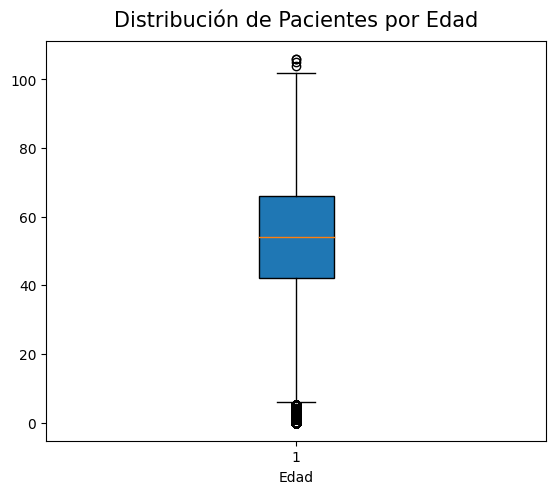

In [100]:
fig = plt.figure(figsize=(5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(df_limpio.EDAD,patch_artist=True)
eje.set_title('Distribución de Pacientes por Edad',fontsize=15,pad=10)
eje.set_xlabel('Edad',fontsize=10);

Observamos que hay datos que estan por fuera de la distribución promedio de nuestra base de datos por lo que vamos a crear nuestros cuartiles para evaluar la dispersión de los datos y determinar su tendencia, luego vamos a excluir los datos que estan fuera de esa tendencia para que no alteren nuestras conclusiones

In [101]:
valor = df_limpio['EDAD']
Q1 = valor.quantile(.25) #quartil 1 = 25% de los datos
Q3 = valor.quantile(.75) #quartil 3 = 75% de los datos
IIQ = Q3 - Q1 # IIQ = Intervalo Inter Quartil
limite_inferior =  Q1 - 1.5*IIQ
limite_superior =  Q3 + 1.5*IIQ

In [102]:
# Creamos nuestra selección y luego creamos un DataFrame limpio, sin outliers, lo visualizamos de nuevo con boxplot
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))
df_clean = df_limpio[seleccion]
df_limpio.shape[0] - df_clean.shape[0]


19792

Se eliminaron 19792 registros, ahora vemos como esta nuestra distribución en el boxplot

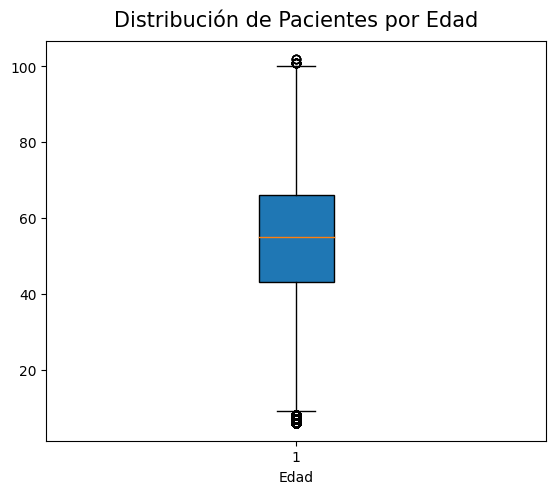

In [103]:
fig = plt.figure(figsize=(5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(df_clean.EDAD,patch_artist=True)
eje.set_title('Distribución de Pacientes por Edad',fontsize=15,pad=10)
eje.set_xlabel('Edad',fontsize=10);

In [104]:
df_clean.shape

(800883, 17)

In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800883 entries, 0 to 820674
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOCUMENTO_ANONIMIZADO  800883 non-null  int64         
 1   PERIODO                800883 non-null  datetime64[ns]
 2   RENAES                 800883 non-null  int64         
 3   IPRESS                 800883 non-null  object        
 4   REGION                 800883 non-null  object        
 5   DEPARTAMENTO           800883 non-null  object        
 6   PROVINCIA              800883 non-null  object        
 7   DISTRITO               800883 non-null  object        
 8   DIAGNOSTICOS           800883 non-null  object        
 9   GRUPO_DIAGNOSTICOS     800883 non-null  object        
 10  SEXO                   800883 non-null  object        
 11  EDAD                   800883 non-null  int64         
 12  TIPO_SEGURO            800883 non-null  obje

In [106]:
df_clean.describe()

,DOCUMENTO_ANONIMIZADO,RENAES,EDAD,CODIGO_SERVICIO,MONTO_BRUTO
count,800883.000000,800883.000000,800883.000000,800883.000000,800883.000000
mean,59310.566452,7206.531138,53.023252,189.600922,241.279972
std,84197.797888,4225.089542,17.924973,302.494634,2561.740747
min,0.000000,1.000000,6.000000,56.000000,0.000000
25%,24712.000000,6210.000000,43.000000,56.000000,10.550000
50%,50347.000000,6210.000000,55.000000,61.000000,34.080000
75%,75320.000000,7277.000000,66.000000,71.000000,95.890000
max,999400.000000,28025.000000,102.000000,910.000000,800740.915000


# Análisis Exploratorio de Datos


###**1. Top 10 de pacientes con el mayor número de atenciones oncológicas**

In [107]:
result_1 =pd.DataFrame(df_clean.groupby("DOCUMENTO_ANONIMIZADO")["PERIODO"].count()).rename(columns = {'PERIODO':'CANTIDAD'}).sort_values(ascending = False, by="CANTIDAD")
sum_atenciones = sum(result_1 ["CANTIDAD"])
result_1.iloc[:10]

,CANTIDAD
DOCUMENTO_ANONIMIZADO,
26150,300
29762,260
57354,239
76377,226
8014,220
2671,208
5581,205
89740,202
75950,198


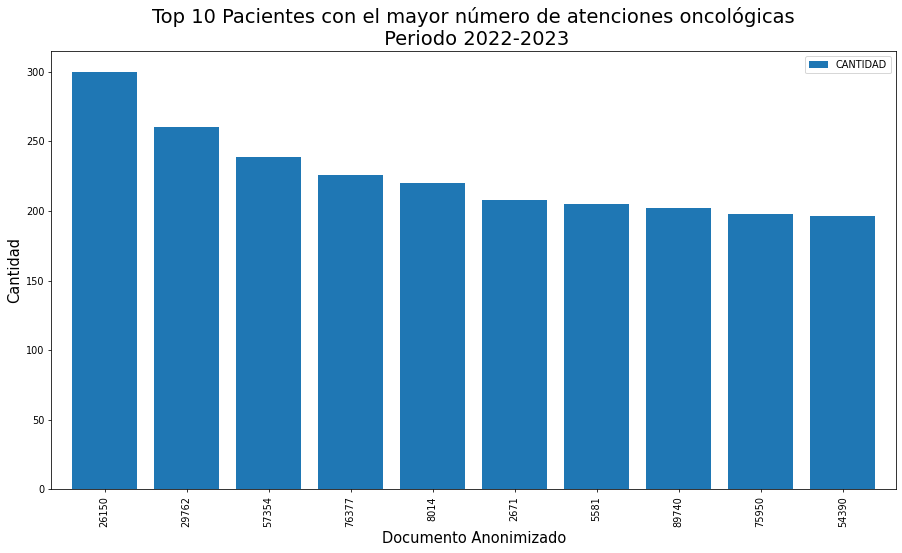

In [108]:
fig, ax = plt.subplots(figsize = (13,8), dpi = 70)
result_1.iloc[:10].plot(kind='bar', ax = ax, width = 0.8)
plt.xlabel("Documento Anonimizado",size= 15)
plt.ylabel("Cantidad",size=15)
plt.title("Top 10 Pacientes con el mayor número de atenciones oncológicas\n Periodo 2022-2023",size = 20)
plt.tight_layout()
plt.savefig('top10_pacientes.png')
plt.show()


###**2. Porcentaje gastado por cada grupo de diagnóstico**

In [109]:
result_2 = (df_clean.groupby("GRUPO_DIAGNOSTICOS")["MONTO_BRUTO"]
             .sum()
             .round(1)
             .sort_values(ascending=False)
             .apply(lambda x: '{:,}'.format(x)))
# Creamos el dataframe del resultado
result_2 = pd.DataFrame({'MONTO_BRUTO': result_2})
result_2

,MONTO_BRUTO
GRUPO_DIAGNOSTICOS,
LEUCEMIA,"66,671,013.1"
CANCER DE MAMA,"41,219,411.2"
CANCER DE CUELLO UTERINO,"24,566,952.5"
LINFOMA,"22,786,503.0"
CANCER DE ESTOMAGO,"14,442,650.4"
CANCER DE COLON,"14,339,090.7"
CANCER DE PROSTATA,"9,211,407.0"


In [110]:
result_2 = (df_clean.groupby("GRUPO_DIAGNOSTICOS")["MONTO_BRUTO"]
             .sum()
             .round(1)
             .sort_values(ascending=False)
             .apply(lambda x: x / df_clean['MONTO_BRUTO'].sum()) * 100).round(1) # calculamos el porcentaje


# Creamos el dataframe para el porcentaje
result_2 = pd.DataFrame({'Percentage': result_2})
result_2


,Percentage
GRUPO_DIAGNOSTICOS,
LEUCEMIA,34.5
CANCER DE MAMA,21.3
CANCER DE CUELLO UTERINO,12.7
LINFOMA,11.8
CANCER DE ESTOMAGO,7.5
CANCER DE COLON,7.4
CANCER DE PROSTATA,4.8


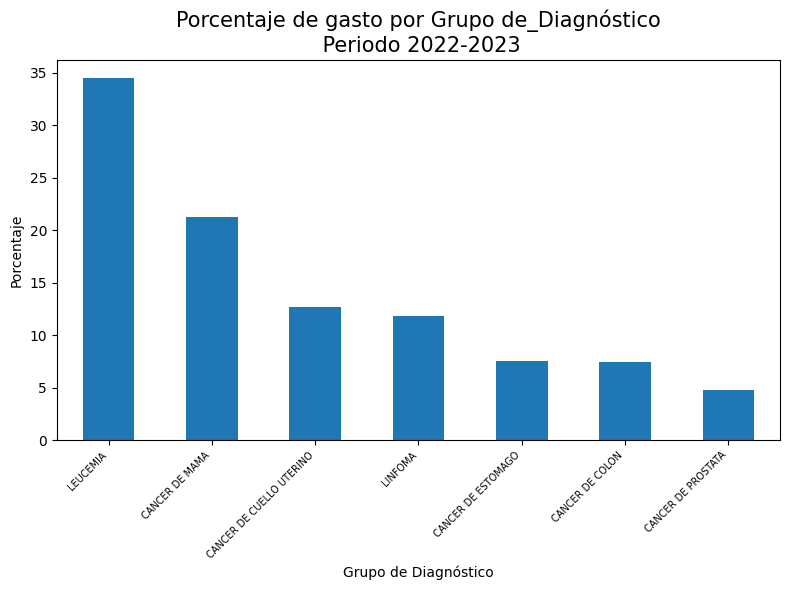

In [111]:
# Trazamos el gráfico de barras
result_2.plot(kind='bar',figsize=(8,6), legend=False)
plt.xlabel('Grupo de Diagnóstico',size=10)
plt.ylabel('Porcentaje',size=10)
plt.title('Porcentaje de gasto por Grupo de_Diagnóstico\n Periodo 2022-2023',size=15)
plt.xticks(rotation=45, ha='right',size=7)
plt.tight_layout()  # ajustamos el diseño para mejorar la visualización
plt.savefig('porcent_gasto.png')
plt.show()

###**3. Porcentaje de mujeres y hombres atendidos**

In [112]:
pacientes_sexo = df_clean['SEXO'].value_counts()
pacientes_sexo

FEMENINO     589448
MASCULINO    211435
Name: SEXO, dtype: int64

In [113]:
# Calculamos el porcentaje de mujeres y hombres
sex_percentages = pacientes_sexo/ len(df_clean) * 100
sex_percentages


FEMENINO     73.599764
MASCULINO    26.400236
Name: SEXO, dtype: float64

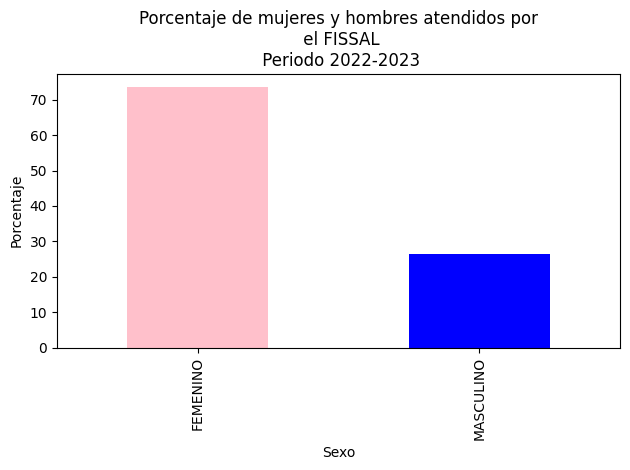

In [114]:
# Creamos el gráfico de barras
sex_percentages.plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de mujeres y hombres atendidos por\n el FISSAL\n Periodo 2022-2023')
plt.savefig('porcent_fem_masc.png')
plt.tight_layout()
plt.show()


###**4. Porcentaje de atenciones oncológicas del sexo femenino por grupo de diagnóstico**

In [115]:
result_4 = pd.DataFrame(df_clean[df_clean["SEXO"] =="FEMENINO"]
           .groupby("GRUPO_DIAGNOSTICOS")["DOCUMENTO_ANONIMIZADO"]
           .count())
result_4.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO")


,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE MAMA,298083
CANCER DE CUELLO UTERINO,148579
LEUCEMIA,43232
LINFOMA,42685
CANCER DE COLON,28545
CANCER DE ESTOMAGO,28324


In [116]:
result_4 ["DOCUMENTO_ANONIMIZADO"] = result_4["DOCUMENTO_ANONIMIZADO"].apply(lambda x : round(x / (sum(result_4["DOCUMENTO_ANONIMIZADO"]))*100, 2))
result_4.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO")

,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE MAMA,50.57
CANCER DE CUELLO UTERINO,25.21
LEUCEMIA,7.33
LINFOMA,7.24
CANCER DE COLON,4.84
CANCER DE ESTOMAGO,4.81


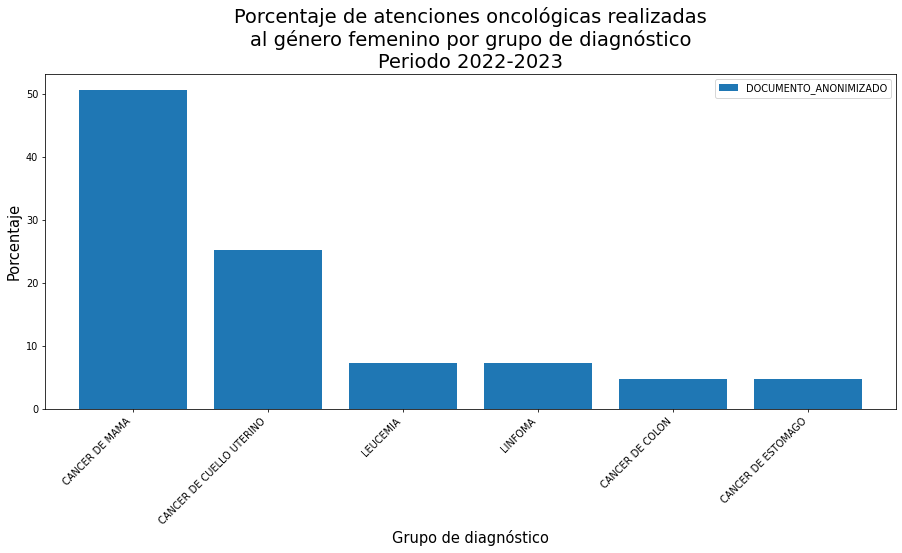

In [117]:
fig, ax = plt.subplots(figsize = (13,8), dpi = 70)
result_4.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO").plot(kind='bar', ax = ax, width = 0.8)
plt.xlabel("Grupo de diagnóstico",size=15)
plt.xticks(rotation=45, ha='right',size=10)
plt.ylabel("Porcentaje",size=15)
plt.title("Porcentaje de atenciones oncológicas realizadas\nal género femenino por grupo de diagnóstico\nPeriodo 2022-2023",size = 20)
plt.tight_layout()
plt.savefig('porcent_atencion_diag_fem.png')
plt.show()


###**5. Porcentaje de atenciones oncológicas del sexo masculino por grupo de diagnóstico**

In [118]:
result_5 = pd.DataFrame(df_clean[df_clean["SEXO"] == "MASCULINO"]
                        .groupby("GRUPO_DIAGNOSTICOS")["DOCUMENTO_ANONIMIZADO"].count())
result_5.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO")

,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE PROSTATA,71648
LEUCEMIA,49938
LINFOMA,38406
CANCER DE ESTOMAGO,26944
CANCER DE COLON,22739
CANCER DE MAMA,1760


In [119]:
result_5 ["DOCUMENTO_ANONIMIZADO"] = result_5["DOCUMENTO_ANONIMIZADO"].apply(lambda x : round(x / (sum(result_5["DOCUMENTO_ANONIMIZADO"]))*100, 2))
result_5.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO")

,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE PROSTATA,33.89
LEUCEMIA,23.62
LINFOMA,18.16
CANCER DE ESTOMAGO,12.74
CANCER DE COLON,10.75
CANCER DE MAMA,0.83


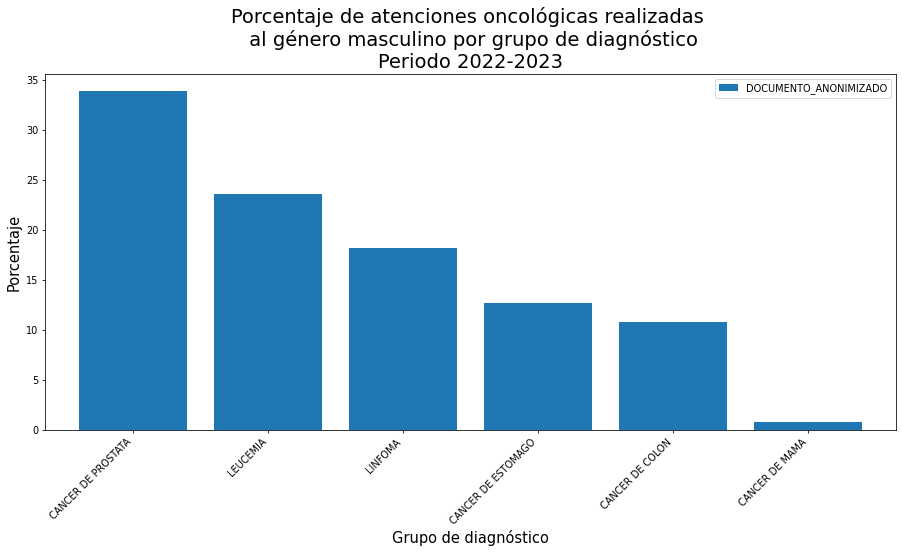

In [120]:
fig, ax = plt.subplots(figsize = (13,8), dpi = 70)
result_5.sort_values(ascending = False, by ="DOCUMENTO_ANONIMIZADO").plot(kind='bar', ax = ax, width = 0.8)
plt.xlabel("Grupo de diagnóstico",size=15)
plt.xticks(rotation=45, ha='right',size=10)
plt.ylabel("Porcentaje",size=15)
plt.title("Porcentaje de atenciones oncológicas realizadas \n al género masculino por grupo de diagnóstico\nPeriodo 2022-2023",size = 20)
plt.tight_layout()
plt.savefig('porcent_atencion_diag_masc.png')
plt.show()


###**6. Distribución por grupo de diagnóstico oncológico según la edad en el sexo masculino**

In [121]:
# Creamos una nueva columna en el dataframe para agrupar la columna 'EDAD'
age_bins = [6, 18, 30, 40, 55, 102]
age_labels = ['6 to 18', '18 to 30', '30 to 40', '40 to 55', '55 >']
df_clean['GRUPO_EDAD']= pd.cut(df_clean['EDAD'], bins=age_bins, labels=age_labels, right=False)
df_clean[['GRUPO_DIAGNOSTICOS','EDAD','GRUPO_EDAD']].sample(10)


<ipython-input-121-132cb3361f61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GRUPO_EDAD']= pd.cut(df_clean['EDAD'], bins=age_bins, labels=age_labels, right=False)


,GRUPO_DIAGNOSTICOS,EDAD,GRUPO_EDAD
146897,CANCER DE MAMA,51,40 to 55
452947,LINFOMA,29,18 to 30
789150,LEUCEMIA,20,18 to 30
531636,LEUCEMIA,19,18 to 30
689815,CANCER DE MAMA,57,55 >
297213,CANCER DE PROSTATA,67,55 >
562314,CANCER DE COLON,68,55 >
606770,CANCER DE MAMA,59,55 >
532224,LEUCEMIA,10,6 to 18
460202,LEUCEMIA,12,6 to 18


In [122]:
# Creamos el dataframe considerando solo el sexo masculino y los grupos de diagnósticos
result_6 = df_clean[df_clean["SEXO"] == "MASCULINO"].groupby(["GRUPO_EDAD", "GRUPO_DIAGNOSTICOS"]).size().unstack(fill_value=0)
result_6

GRUPO_DIAGNOSTICOS,CANCER DE COLON,CANCER DE ESTOMAGO,CANCER DE MAMA,CANCER DE PROSTATA,LEUCEMIA,LINFOMA
GRUPO_EDAD,,,,,,
6 to 18,71,60,91,0,23585,3862
18 to 30,579,281,71,45,9832,4480
30 to 40,1469,1475,151,76,4008,3656
40 to 55,6026,5351,289,2187,6399,8131
55 >,14594,19774,1158,69340,6114,18276


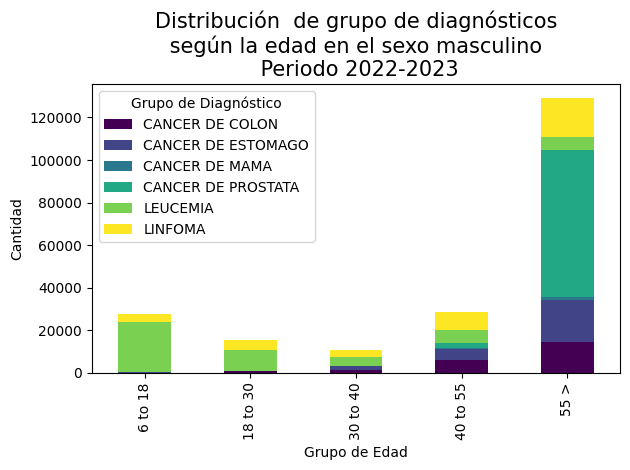

In [123]:
# Trazamos un gráfico de barras apiladas
result_6.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Grupo de Edad',size=10)
plt.ylabel('Cantidad',size=10)
plt.title('Distribución  de grupo de diagnósticos\n según la edad en el sexo masculino \n Periodo 2022-2023',size=15)
plt.legend(title='Grupo de Diagnóstico')
plt.tight_layout()
plt.savefig('distrib_diagnost_masc.png')
plt.show()


###**7. Distribución por grupo de diagnóstico oncológico según la edad en el sexo femenino**

In [124]:
result_7 = df_clean[df_clean["SEXO"] == "FEMENINO"].groupby(["GRUPO_EDAD", "GRUPO_DIAGNOSTICOS"]).size().unstack(fill_value=0)
result_7

GRUPO_DIAGNOSTICOS,CANCER DE COLON,CANCER DE CUELLO UTERINO,CANCER DE ESTOMAGO,CANCER DE MAMA,LEUCEMIA,LINFOMA
GRUPO_EDAD,,,,,,
6 to 18,92,35,17,148,17994,1711
18 to 30,699,4190,485,4381,7368,3440
30 to 40,1338,19301,1760,31437,3402,3741
40 to 55,6935,57720,7437,125715,6121,8456
55 >,19481,67333,18625,136402,8347,25337


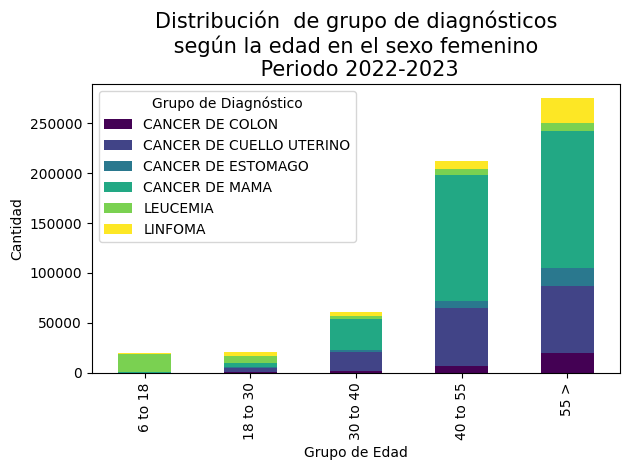

In [125]:
result_7.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Grupo de Edad',size=10)
plt.ylabel('Cantidad',size=10)
plt.title('Distribución  de grupo de diagnósticos\n según la edad en el sexo femenino \n Periodo 2022-2023',size=15)
plt.legend(title='Grupo de Diagnóstico')
plt.tight_layout()
plt.savefig('distrib_diagnost_fem.png')
plt.show()

# **Aplicación de Machine Learning No Supervisado - Algoritmo de Clustering K-means**

Para que vamos a usar este tipo de machine learning?

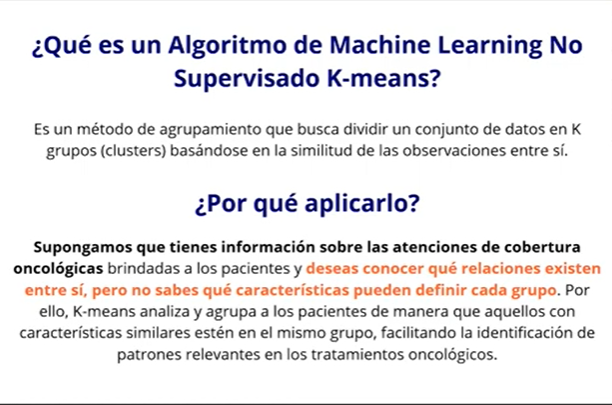

Vamos a analizar sus componentes:


### StandardScaler

Es como un ajuste automático de la escala de tus datos. Por ejemplo: estas midiendo la altura en metros y el peso en kilogramos y quieres que ambos esten en la misma escala.

### OneHotEncoder

Sirve para etiquetar automáticamente categorías. Por ejemplo: si tienes una columna con valores: 'rojo', 'verde' y ázul',
 **OneHotEncoder** crea columnas separadas para cada valor y asigna un 1 o 0 para indicar la presencia o ausencia del color.

### Principal Component Analysis (PCA)

Es como encontrar la esencia de tus datos. Si tienes muchas características que describen algo como altura, peso y edad de una persona, **PCA** simplifica esto al identificar cuál de ellas tiene mayor variabilidad o dispersión.

### Metricas que nos indican la validez del algoritmo

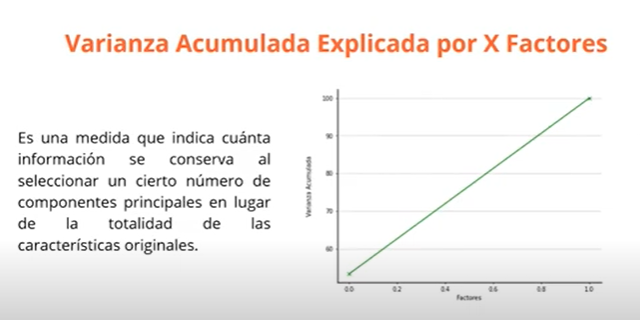

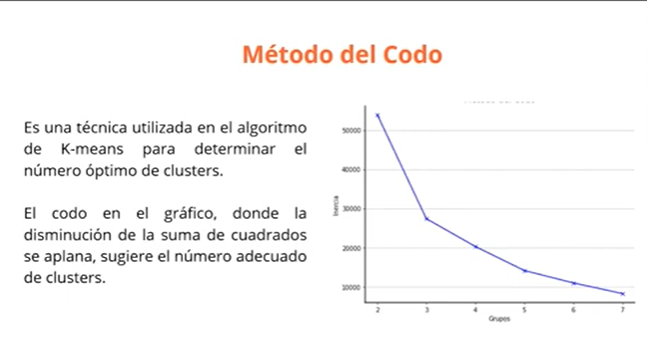

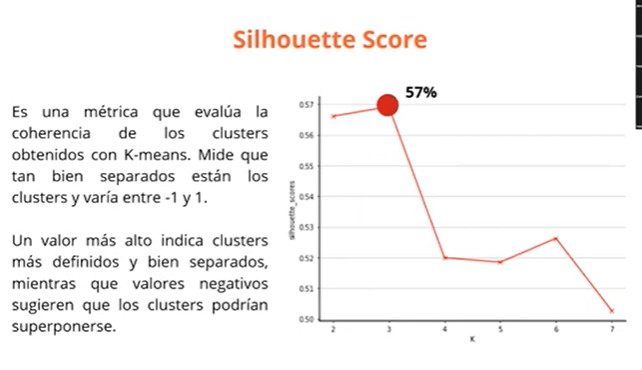

In [126]:
#Importamos las librerías
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [127]:
data_v2 = df_clean.groupby("DOCUMENTO_ANONIMIZADO").agg({'EDAD':'mean',
'MONTO_BRUTO':'mean'}).reset_index()
data_kmeans = data_v2[["EDAD", "MONTO_BRUTO"]]
data_kmeans


,EDAD,MONTO_BRUTO
0,76.000000,70.340000
1,46.590909,63.720455
2,47.000000,28.105000
3,44.000000,612.460000
4,32.000000,392.628000
...,...,...
39980,59.142857,438.681429
39981,49.000000,163.500345
39982,31.000000,293.249583
39983,36.000000,40.660000


In [128]:
std = StandardScaler()
data_kmeans_transformer = pd.DataFrame(std.fit_transform(data_kmeans))
data_kmeans_transformer.columns = ['EDAD', 'MONTO_BRUTO']
data_kmeans_transformer

,EDAD,MONTO_BRUTO
0,1.273207,-0.092651
1,-0.362002,-0.095137
2,-0.339256,-0.108512
3,-0.506063,0.110933
4,-1.173289,0.028379
...,...,...
39980,0.335913,0.045673
39981,-0.228052,-0.057667
39982,-1.228891,-0.008941
39983,-0.950880,-0.103797


In [129]:
pca = PCA()
pca.fit_transform(data_kmeans_transformer)
data_kmeans_transformer_pca = pca.transform(data_kmeans_transformer)
var = pca.explained_variance_ratio_
var_cum = np.cumsum(np.round(var, decimals = 4)*100)

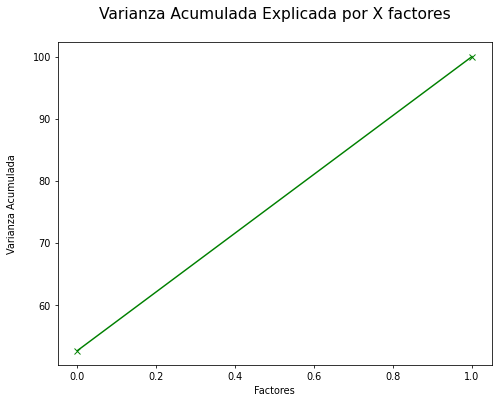

In [130]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
ax = plt.gca()
plt.plot(var_cum, 'g-x')
plt.title("Varianza Acumulada Explicada por X factores\n",
 size = 16)
plt.xlabel("Factores")
plt.ylabel("Varianza Acumulada\n")
plt.show()

In [131]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2, 8)
for i in k:
 print(i)
 km = KMeans(n_clusters = i)
 y_predict = km.fit_predict(data_kmeans_transformer_pca)
 sum_of_squared_distances.append(km.inertia_)
 silhouette_scores.append(silhouette_score(data_kmeans_transformer_pca,
y_predict))


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
km = KMeans(n_clusters = 3)
y_predict = km.fit_predict(data_kmeans_transformer_pca)
print(silhouette_score(data_kmeans_transformer_pca, y_predict))
data_v2["KMeans"] = y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5632035319879131


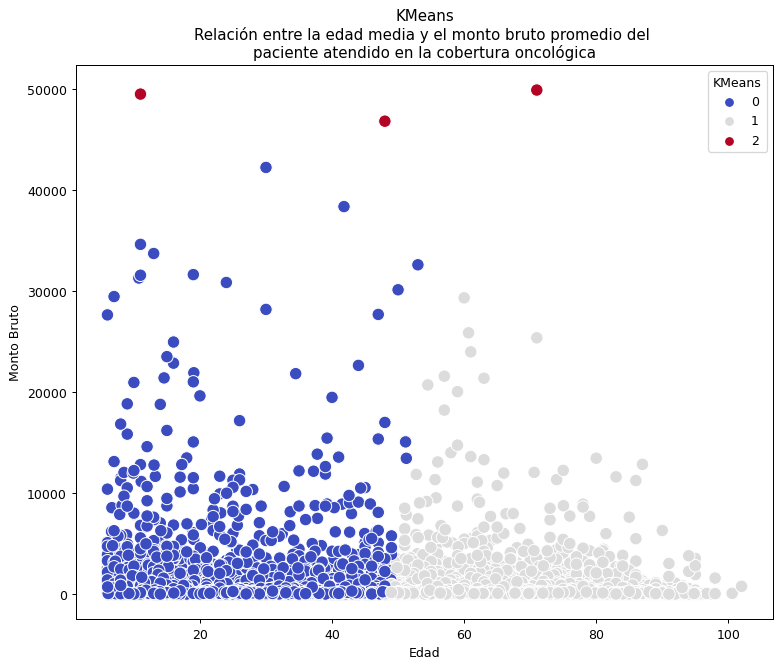

In [133]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = data_v2[data_v2["MONTO_BRUTO"]<=50000], x = "EDAD", y = "MONTO_BRUTO", hue = "KMeans", palette = 'coolwarm', s = 100)
plt.title("KMeans\nRelación entre la edad media y el monto bruto promedio del \npaciente atendido en la cobertura oncológica")
plt.xlabel("Edad")
plt.ylabel("Monto Bruto")
plt.show()

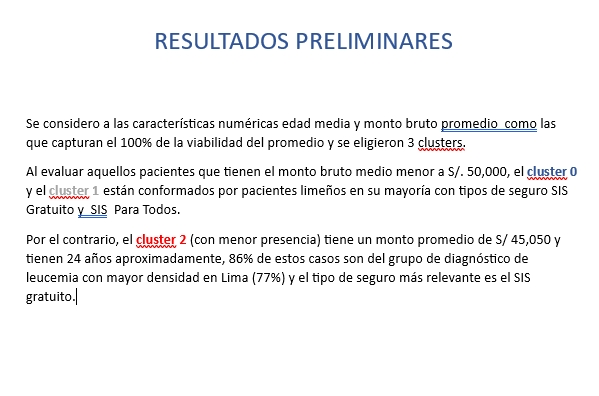